In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt
plt.style.use(["science","notebook","grid"])

2023-12-14 11:34:50.059494: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-14 11:34:50.162815: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-14 11:34:50.166335: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-12-14 11:34:50.166347: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore 

In [2]:
# Load the saved model
loaded_model = tf.keras.models.load_model('best_model.h5')

2023-12-14 11:34:52.160249: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-12-14 11:34:52.160275: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-12-14 11:34:52.160290: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (HPG-01): /proc/driver/nvidia/version does not exist
2023-12-14 11:34:52.160521: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# Load your dataset
df = pd.read_csv('updated_Data_till_T0_2-75_durga_oct17.csv')

# Shuffle the DataFrame
data = df.sample(frac=1, random_state=58)

# Select the first 100 rows for training and testing
data = data[:1000]

# Define input features and target variables
input_features = ['n1', 'l1', 'j1', 'LP', 'Te', 'Z', 'A', 'Rfq', 'T0' ]
target_variables = ['n2', 'l2', 'j2', 'n3', 'l3', 'j3']


# Split the dataset into input (X) and target (y) variables
X = data[input_features]
y = data[target_variables]

# # Normalize input features using StandardScaler
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# # Split the dataset into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [26]:
data

,n1,l1,j1,n2,l2,j2,n3,l3,j3,LP,Te,Z,A,Rfq,T0
4154812,7,3,2.5,8,3,2.5,14,2,1.5,1.0000,0.2769,19,39,12814.6540,2.0313
3222088,7,4,3.5,8,4,3.5,13,5,4.5,0.6694,0.1385,37,87,5040.8636,2.1913
1509592,9,7,6.5,10,5,4.5,14,6,5.5,0.3388,0.9000,19,39,5912.4263,3.0792
4594608,11,10,9.5,12,8,7.5,14,9,8.5,1.0000,0.1038,37,87,27368.6253,2.3955
3815617,6,3,2.5,7,3,3.5,14,2,2.5,0.8347,0.3808,37,85,9176.9576,2.8142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3377787,9,7,7.5,10,7,7.5,12,6,6.5,0.8347,0.0173,55,133,21340.8249,2.2933
601580,5,3,2.5,6,1,0.5,11,2,1.5,0.0083,0.4327,11,23,539.6512,11.8168
4437426,7,5,5.5,8,3,3.5,12,4,4.5,1.0000,0.8480,3,7,8070.9044,2.7982
2257765,12,1,1.5,13,1,0.5,14,2,1.5,0.5041,0.6577,19,40,14345.3099,2.5069


In [ ]:
loaded_model.predict()

In [4]:
# Use the loaded model to make predictions
scaler = StandardScaler()
# Fit the scaler on the training data
scaler.fit(X)
X_new_data = X  # Provide new data for prediction, shape should match the input shape during training
X_new_data_scaled = scaler.transform(X_new_data)  # Scale the new data using the same scaler used during training
predictions = loaded_model.predict(X_new_data_scaled)


32/32 [==============================] - 0s 839us/step


In [25]:
X_new_data_scaled[0]

array([-0.17537292, -0.70322205, -0.90275685,  1.52044557, -0.66087038,
        0.00441744, -0.09240066,  0.4373091 , -0.36900461])

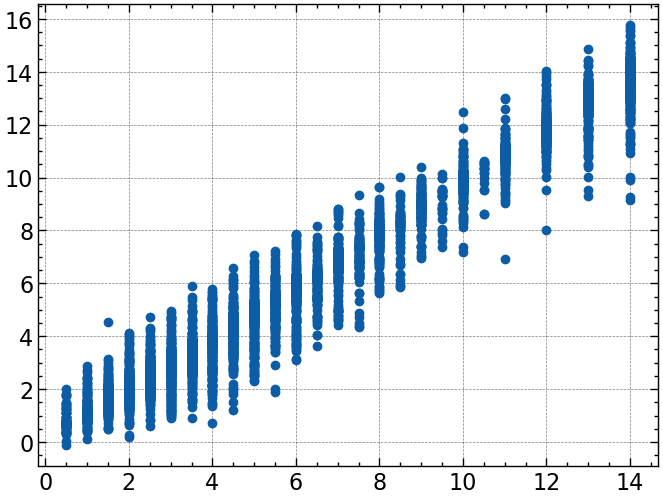

In [5]:
plt.scatter(y,predictions)

In [6]:
# Calculate and print mean absolute error and mean squared error
mae = mean_absolute_error(y.n2.values, predictions.T[0])
mse = mean_squared_error(y.n2.values, predictions.T[0])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


# Calculate and print mean absolute error and mean squared error
mae = mean_absolute_error(y.l2.values, predictions.T[1])
mse = mean_squared_error(y.l2.values, predictions.T[1])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Calculate and print mean absolute error and mean squared error
mae = mean_absolute_error(y.j2.values, predictions.T[2])
mse = mean_squared_error(y.j2.values, predictions.T[2])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


# Calculate and print mean absolute error and mean squared error
mae = mean_absolute_error(y.n3.values, predictions.T[3])
mse = mean_squared_error(y.n3.values, predictions.T[3])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")


# Calculate and print mean absolute error and mean squared error
mae = mean_absolute_error(y.l3.values, predictions.T[4])
mse = mean_squared_error(y.l3.values, predictions.T[4])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

# Calculate and print mean absolute error and mean squared error
mae = mean_absolute_error(y.j3.values, predictions.T[5])
mse = mean_squared_error(y.j3.values, predictions.T[5])
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")

Mean Absolute Error (MAE): 0.14303376388549804
Mean Squared Error (MSE): 0.06481745630556633
Mean Absolute Error (MAE): 0.5876358375996351
Mean Squared Error (MSE): 0.7358659882605694
Mean Absolute Error (MAE): 0.5192314867973328
Mean Squared Error (MSE): 0.6442511624514293
Mean Absolute Error (MAE): 0.5749362835884094
Mean Squared Error (MSE): 0.7270832299565311
Mean Absolute Error (MAE): 0.42932024186849593
Mean Squared Error (MSE): 0.4818002697262833
Mean Absolute Error (MAE): 0.44103757774829866
Mean Squared Error (MSE): 0.3410871392047952


In [7]:
# plt.figure(figsize=(4, 3))
# plt.scatter(y.n2.values, predictions.T[0], label='Actual vs. Predicted')
# plt.plot(y.n2.values, y.n2.values, color='red', label='Perfect Predictions')
# plt.title('Actual vs. Predicted values for n2')
# plt.xlabel('Actual n2 values')
# plt.ylabel('Predicted n2 values')
# plt.legend()
# plt.show()

# plt.figure(figsize=(4, 3))
# plt.scatter(y.l2.values, predictions.T[1], label='Actual vs. Predicted')
# plt.plot(y.l2.values, y.l2.values, color='red', label='Perfect Predictions')
# plt.title('Actual vs. Predicted values for l2')
# plt.xlabel('Actual l2 values')
# plt.ylabel('Predicted l2 values')
# plt.legend()
# plt.show()

# plt.figure(figsize=(4, 3))
# plt.scatter(y.j2.values, predictions.T[2], label='Actual vs. Predicted')
# plt.plot(y.j2.values, y.j2.values, color='red', label='Perfect Predictions')
# plt.title('Actual vs. Predicted values for j2')
# plt.xlabel('Actual j2 values')
# plt.ylabel('Predicted j2 values')
# plt.legend()
# plt.show()



# plt.figure(figsize=(4, 3))
# plt.scatter(y.n3.values, predictions.T[3], label='Actual vs. Predicted')
# plt.plot(y.n3.values, y.n3.values, color='red', label='Perfect Predictions')
# plt.title('Actual vs. Predicted values for n3')
# plt.xlabel('Actual n3 values')
# plt.ylabel('Predicted n3 values')
# plt.legend()
# plt.show()

# plt.figure(figsize=(4, 3))
# plt.scatter(y.l3.values, predictions.T[4], label='Actual vs. Predicted')
# plt.plot(y.l3.values, y.l3.values, color='red', label='Perfect Predictions')
# plt.title('Actual vs. Predicted values for l3')
# plt.xlabel('Actual l3 values')
# plt.ylabel('Predicted l3values')
# plt.legend()
# plt.show()

# plt.figure(figsize=(4, 3))
# plt.scatter(y.j3.values, predictions.T[2], label='Actual vs. Predicted')
# plt.plot(y.j3.values, y.j3.values, color='red', label='Perfect Predictions')
# plt.title('Actual vs. Predicted values for j3')
# plt.xlabel('Actual j3 values')
# plt.ylabel('Predicted j3 values')
# plt.legend()
# plt.show()

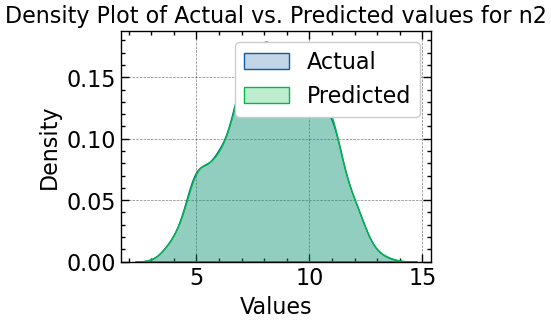

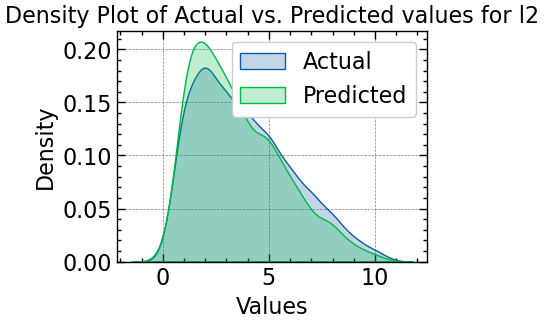

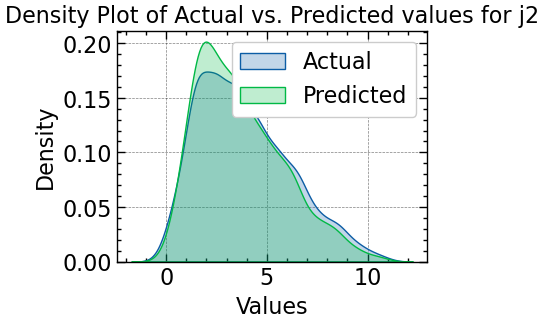

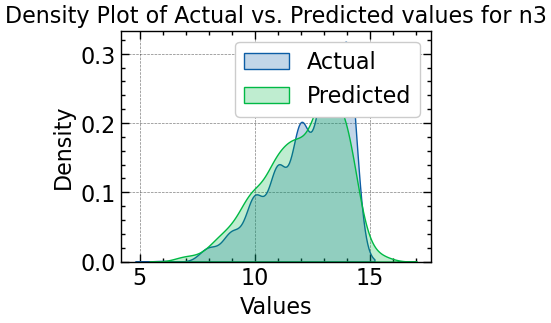

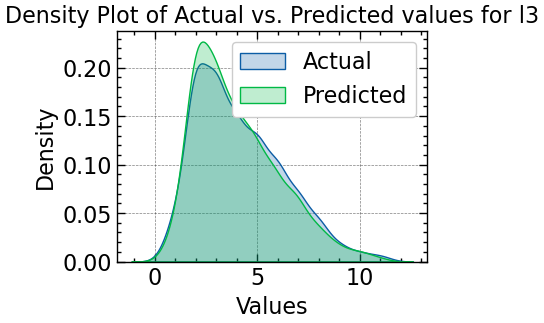

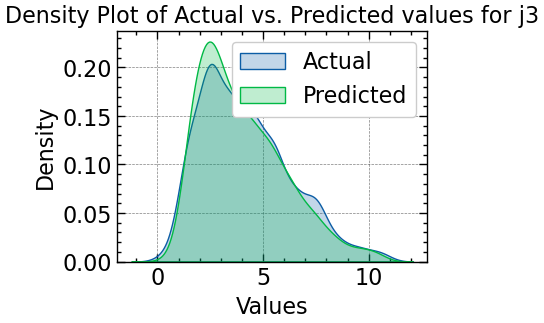

In [8]:
import seaborn as sns

plt.figure(figsize=(4,3))
sns.kdeplot(y.n2.values, label='Actual', fill=True)
sns.kdeplot(predictions.T[0], label='Predicted', fill=True)
plt.title('Density Plot of Actual vs. Predicted values for n2')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
sns.kdeplot(y.l2.values, label='Actual', fill=True)
sns.kdeplot(predictions.T[1], label='Predicted', fill=True)
plt.title('Density Plot of Actual vs. Predicted values for l2')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
sns.kdeplot(y.j2.values, label='Actual', fill=True)
sns.kdeplot(predictions.T[2], label='Predicted', fill=True)
plt.title('Density Plot of Actual vs. Predicted values for j2')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()



plt.figure(figsize=(4,3))
sns.kdeplot(y.n3.values, label='Actual', fill=True)
sns.kdeplot(predictions.T[3], label='Predicted', fill=True)
plt.title('Density Plot of Actual vs. Predicted values for n3')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
sns.kdeplot(y.l3.values, label='Actual', fill=True)
sns.kdeplot(predictions.T[4], label='Predicted', fill=True)
plt.title('Density Plot of Actual vs. Predicted values for l3')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

plt.figure(figsize=(4,3))
sns.kdeplot(y.j3.values, label='Actual', fill=True)
sns.kdeplot(predictions.T[5], label='Predicted', fill=True)
plt.title('Density Plot of Actual vs. Predicted values for j3')
plt.xlabel('Values')
plt.ylabel('Density')
plt.legend()
plt.show()

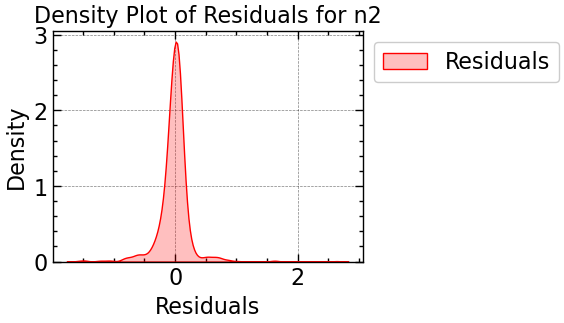

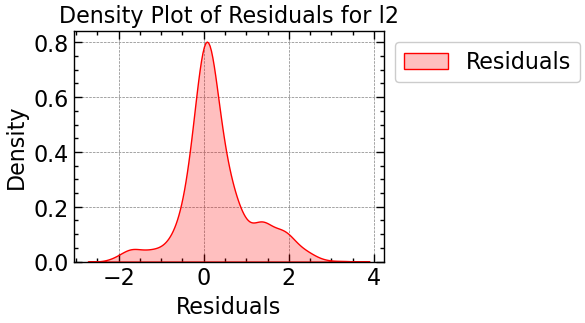

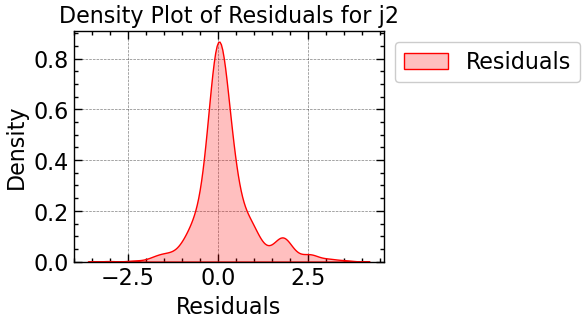

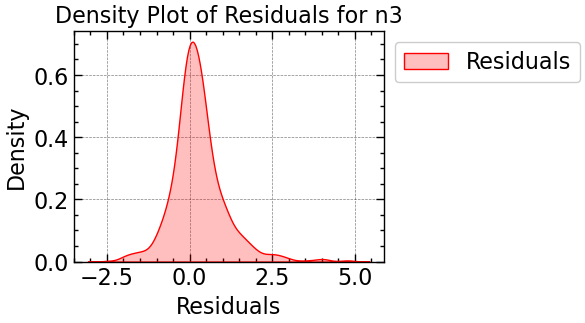

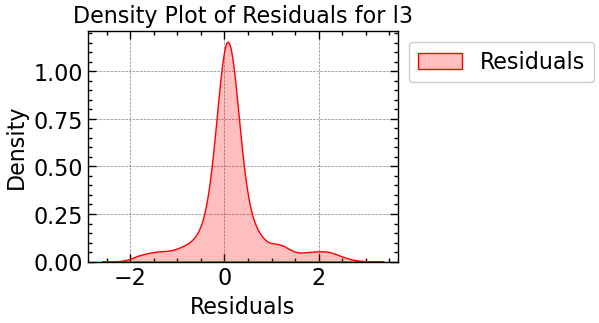

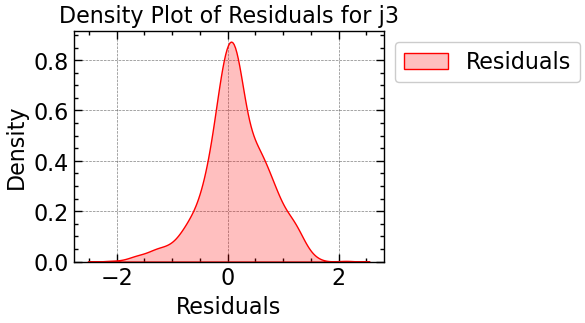

In [9]:
import seaborn as sns

# Function to create density plot for residuals
def plot_residuals(residuals, label, title):
    plt.figure(figsize=(4, 3))
    sns.kdeplot(residuals, label=label, fill=True, color='red')
    plt.title(title)
    plt.xlabel('Residuals')
    plt.ylabel('Density')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# Residual density plots for n2
residuals_n2 = y.n2.values - predictions.T[0]
plot_residuals(residuals_n2, 'Residuals', 'Density Plot of Residuals for n2')

# Residual density plots for l2
residuals_l2 = y.l2.values - predictions.T[1]
plot_residuals(residuals_l2, 'Residuals', 'Density Plot of Residuals for l2')

# Residual density plots for j2
residuals_j2 = y.j2.values - predictions.T[2]
plot_residuals(residuals_j2, 'Residuals', 'Density Plot of Residuals for j2')

# Residual density plots for n3
residuals_n3 = y.n3.values - predictions.T[3]
plot_residuals(residuals_n3, 'Residuals', 'Density Plot of Residuals for n3')

# Residual density plots for l3
residuals_l3 = y.l3.values - predictions.T[4]
plot_residuals(residuals_l3, 'Residuals', 'Density Plot of Residuals for l3')

# Residual density plots for j3
residuals_j3 = y.j3.values - predictions.T[5]
plot_residuals(residuals_j3, 'Residuals', 'Density Plot of Residuals for j3')


In [16]:
predictions.T[0]

array([ 8.414851 ,  8.587425 , 10.085651 , 12.00132  ,  7.767352 ,
        8.935317 , 12.007621 ,  5.8662453,  7.7997484,  8.94237  ,
        6.170212 ,  9.028653 ,  8.998815 , 10.138006 ,  6.0997267,
        9.108089 , 10.837213 , 10.958037 ,  7.173443 ,  6.76923  ,
        7.996909 ,  6.1445646,  6.9273157,  5.122035 ,  6.7602406,
       10.901392 , 10.056032 ,  9.985733 ,  7.954277 ,  8.152136 ,
        7.2191067,  7.234207 ,  6.925929 ,  7.9151   ,  4.7603836,
        7.116783 , 12.198891 ,  5.940421 ,  7.0146866,  9.935371 ,
        5.946703 ,  9.149532 ,  6.852007 ,  7.1621   , 11.083934 ,
       12.10806  ,  5.070031 , 11.183482 ,  7.9237423,  9.956048 ,
        9.086176 ,  6.8223476,  6.374264 ,  7.1959105,  7.3206625,
        8.899422 ,  8.961288 ,  8.906534 ,  8.196701 ,  8.037085 ,
       10.125841 ,  7.941471 , 11.033753 ,  5.0863657,  8.036417 ,
        8.999305 ,  6.994197 ,  7.946212 , 10.9211645,  9.959874 ,
        7.896221 , 10.972078 ,  6.9491405,  9.120368 , 11.3098

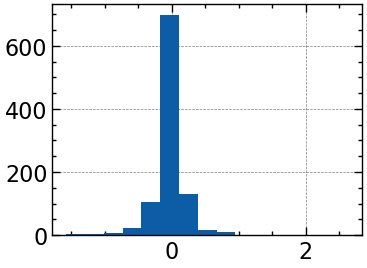

In [23]:
plt.figure(figsize=(4,3))
plt.hist(residuals_n2,bins = 15)
plt.show()

In [ ]:
n_pred = predictions.T[0]/

In [10]:
np.trapz(residuals_j2)

201.17159086465836

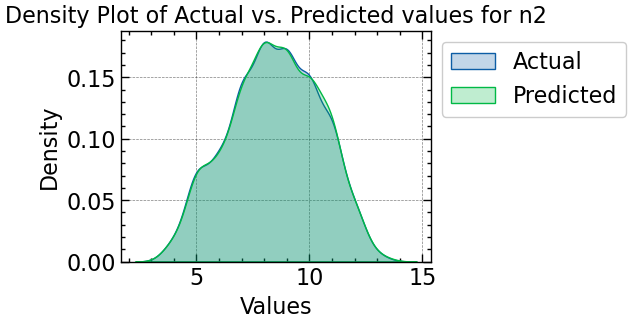

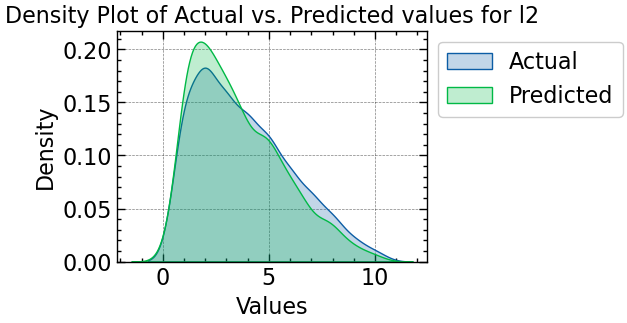

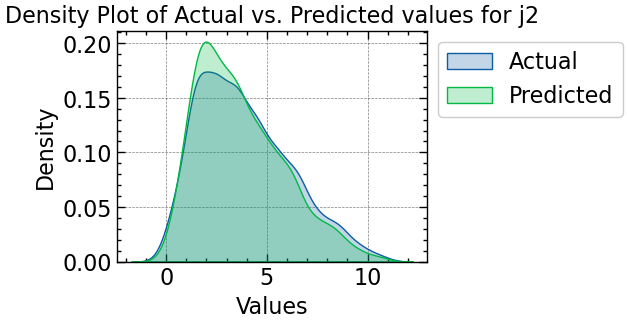

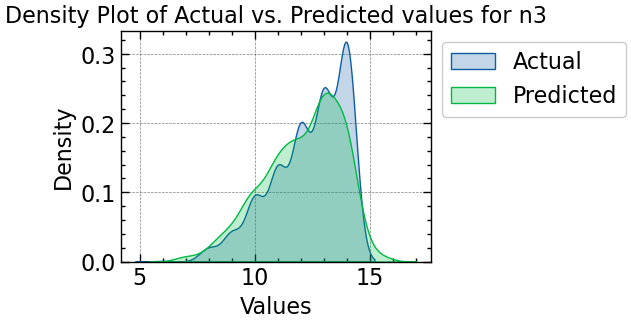

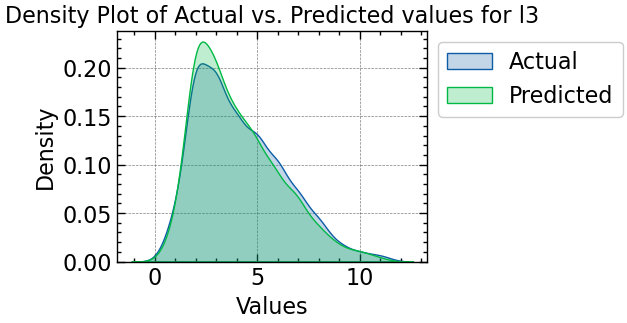

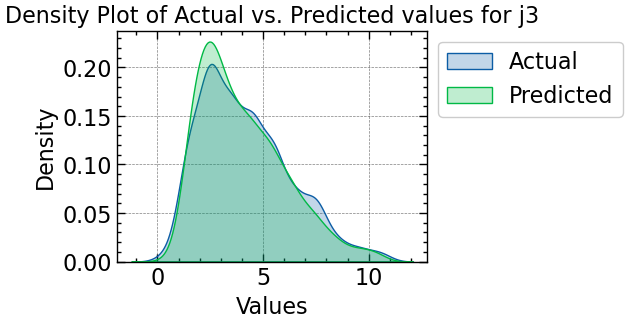

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Function to create density plot
def create_density_plot(actual_values, predicted_values, title):
    plt.figure(figsize=(4, 3))
    sns.kdeplot(actual_values, label='Actual', fill=True)
    sns.kdeplot(predicted_values, label='Predicted', fill=True)
    plt.title(title)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
    plt.show()

# Assuming 'y' and 'predictions' are defined
# Create density plots for each variable
create_density_plot(y.n2.values, predictions.T[0], 'Density Plot of Actual vs. Predicted values for n2')
create_density_plot(y.l2.values, predictions.T[1], 'Density Plot of Actual vs. Predicted values for l2')
create_density_plot(y.j2.values, predictions.T[2], 'Density Plot of Actual vs. Predicted values for j2')
create_density_plot(y.n3.values, predictions.T[3], 'Density Plot of Actual vs. Predicted values for n3')
create_density_plot(y.l3.values, predictions.T[4], 'Density Plot of Actual vs. Predicted values for l3')
create_density_plot(y.j3.values, predictions.T[5], 'Density Plot of Actual vs. Predicted values for j3')


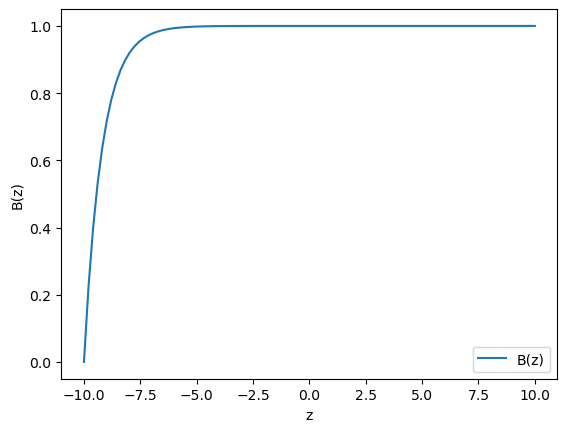

In [29]:
#important 


import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

# Define the function representing the system of ODEs
def ode_system(B, z, sigma_abs, rho_11, sigma_em, rho_22, rho_33, N):
    # Replace the following line with your specific expression for dB/dz
    dB_dz = N * sigma_em * (rho_22 + rho_33) - N * ((sigma_abs * rho_11 - sigma_em * (rho_22 + rho_33)) / 2) * B
    return dB_dz

# Define parameters
sigma_abs = 0.75
rho_11 = 0.5
sigma_em = 0.25
rho_22 = 0.3
rho_33 = 0.2
N = 10

# Initial condition for B and range of z values
B0 = 0.0  # Initial value for B
start_z = -10.0
end_z = 10.0
num_points = 100
z_values = np.linspace(start_z, end_z, num_points)

# Solve the ODE using odeint
solution = odeint(ode_system, B0, z_values, args=(sigma_abs, rho_11, sigma_em, rho_22, rho_33, N))

# Extract the solution for B
B_solution = solution[:, 0]

# Plot the solution
plt.plot(z_values, B_solution, label='B(z)')
plt.xlabel('z')
plt.ylabel('B(z)')
plt.legend()
plt.show()


In [2]:
from sympy import symbols, diff, Eq, Function, N

# Define the symbols
delta, z, sigma_abs, rho11, sigma_em, rho22, rho33, N = symbols('delta z sigma_abs rho11 sigma_em rho22 rho33 N')

# Define the function B(delta, z)
B = Function('B')(delta, z)

# Define the equation
equation = Eq(diff(B, z) + N * ((sigma_abs * rho11 - sigma_em * (rho22 + rho33)) / 2) * B, N * sigma_em * (rho22 + rho33))

# Display the equation
print(equation)

# Simplify the equation
simplified_equation = equation.simplify()
print(simplified_equation)


Eq(N*(rho11*sigma_abs/2 - sigma_em*(rho22 + rho33)/2)*B(delta, z) + Derivative(B(delta, z), z), N*sigma_em*(rho22 + rho33))
Eq(N*sigma_em*(rho22 + rho33), N*(rho11*sigma_abs - sigma_em*(rho22 + rho33))*B(delta, z)/2 + Derivative(B(delta, z), z))


In [3]:
simplified_equation

Eq(N*sigma_em*(rho22 + rho33), N*(rho11*sigma_abs - sigma_em*(rho22 + rho33))*B(delta, z)/2 + Derivative(B(delta, z), z))

In [5]:
from sympy import symbols, diff, Eq, Function, dsolve, N

# Define the symbols
delta, z, sigma_abs, rho11, sigma_em, rho22, rho33, N = symbols('delta z sigma_abs rho11 sigma_em rho22 rho33 N')

# Define the function B as a single variable function
B = Function('B')

# Define the equation
equation = Eq(diff(B(delta, z), z) + N * ((sigma_abs * rho11 - sigma_em * (rho22 + rho33)) / 2) * B(delta, z), N * sigma_em * (rho22 + rho33))

# Solve for B(delta, z)
solution = dsolve(equation)

# Display the solution
print("Solution for B(delta, z):")
print(solution)


ValueError: dsolve() and classify_ode() only work with functions of one variable, not B(delta, z)

In [8]:
from sympy import Function, Eq, Derivative, symbols, pdsolve, pprint

delta, z, sigma_abs, rho11, sigma_em, rho22, rho33, N = symbols('delta z sigma_abs rho11 sigma_em rho22 rho33 N')
B = Function('B')(delta, z)

# Define the PDE
pde = Eq(Derivative(B, z) + N * ((sigma_abs * rho11 - sigma_em * (rho22 + rho33))) * B, N * sigma_em * (rho22 + rho33))

# Solve the PDE
sol = pdsolve(pde)

# Display the solution
pprint(sol)


          ⎧                                                          N⋅z⋅(-ρ₁₁
          ⎪-σₑₘ⋅(ρ₂₂ + ρ₃₃) + (-ρ₁₁⋅σ_abs + ρ₂₂⋅σₑₘ + ρ₃₃⋅σₑₘ)⋅F(δ)⋅ℯ         
          ⎪───────────────────────────────────────────────────────────────────
B(δ, z) = ⎨                                -ρ₁₁⋅σ_abs + ρ₂₂⋅σₑₘ + ρ₃₃⋅σₑₘ     
          ⎪                                                                   
          ⎪                                            N⋅z⋅(-ρ₁₁⋅σ_abs + ρ₂₂⋅σ
          ⎩              (N⋅σₑₘ⋅z⋅(ρ₂₂ + ρ₃₃) + F(δ))⋅ℯ                       

⋅σ_abs + ρ₂₂⋅σₑₘ + ρ₃₃⋅σₑₘ)                                        
                                                                   
───────────────────────────  for -ρ₁₁⋅σ_abs + ρ₂₂⋅σₑₘ + ρ₃₃⋅σₑₘ ≠ 0
                                                                   
                                                                   
ₑₘ + ρ₃₃⋅σₑₘ)                                                      
                                      

In [9]:
sol 

Eq(B(delta, z), Piecewise(((-sigma_em*(rho22 + rho33) + (-rho11*sigma_abs + rho22*sigma_em + rho33*sigma_em)*F(delta)*exp(N*z*(-rho11*sigma_abs + rho22*sigma_em + rho33*sigma_em)))/(-rho11*sigma_abs + rho22*sigma_em + rho33*sigma_em), Ne(-rho11*sigma_abs + rho22*sigma_em + rho33*sigma_em, 0)), ((N*sigma_em*z*(rho22 + rho33) + F(delta))*exp(N*z*(-rho11*sigma_abs + rho22*sigma_em + rho33*sigma_em)), True)))

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, Derivative, pdsolve, lambdify

# Define the symbols
delta, z, sigma_abs, rho11, sigma_em, rho22, rho33, N = symbols('delta z sigma_abs rho11 sigma_em rho22 rho33 N')
B = Function('B')(delta, z)

# Define the PDE
pde = Eq(Derivative(B, z) + N * ((sigma_abs * rho11 - sigma_em * (rho22 + rho33)) / 2) * B, N * sigma_em * (rho22 + rho33))

# Substitute numerical values
numerical_values = {
    sigma_abs: 1.0,
    rho11: 2.0,
    sigma_em: 0.5,
    rho22: 3.0,
    rho33: 4.0,
    N: 0.1
}

# Substitute numerical values into the PDE
pde_numeric = pde.subs(numerical_values)

# Solve the numerical PDE
sol = pdsolve(pde_numeric)

# Extract the solution expression
solution_expr = sol.rhs

# Convert the solution expression to a Python function
B_func = lambdify(delta, solution_expr, "numpy")

# Generate delta values for plotting
delta_values = np.linspace(0, 10, 100)

# Evaluate the solution at different delta values
B_values = B_func(delta_values)

# Plot the solution
plt.plot(delta_values, B_values)
plt.xlabel('delta')
plt.ylabel('B(delta, z)')
plt.title('Solution of the PDE')
plt.grid(True)
plt.show()


NameError: name 'F' is not defined

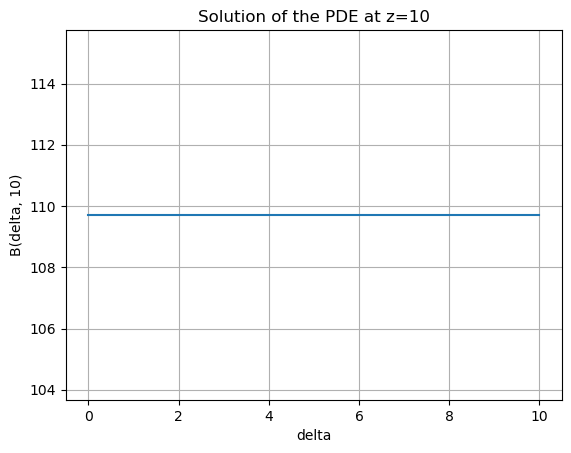

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, Function, Eq, Derivative, pdsolve, lambdify, exp

# Define the symbols
delta, z, sigma_abs, rho11, sigma_em, rho22, rho33, N = symbols('delta z sigma_abs rho11 sigma_em rho22 rho33 N')
B = Function('B')(delta, z)

# Define the PDE
pde = Eq(Derivative(B, z) + N * ((sigma_abs * rho11 - sigma_em * (rho22 + rho33))) * B, N * sigma_em * (rho22 + rho33))

# Substitute numerical values
numerical_values = {
    sigma_abs: 1.0,
    rho11: 2.0,
    sigma_em: 0.5,
    rho22: 3.0,
    rho33: 4.0,
    N: 0.1
}

# Substitute numerical values into the PDE
pde_numeric = pde.subs(numerical_values)

# Solve the numerical PDE
sol = pdsolve(pde_numeric)

# Extract the solution expression
solution_expr = sol.rhs

# Define the symbol F
F = symbols('F')
F = 25
# Convert the solution expression to a Python function
B_func = lambdify((delta, z), solution_expr.subs({Function('F')(delta): F}), "numpy")

# Generate delta values for plotting
delta_values = np.linspace(0, 10, 100)

# Evaluate the solution at different delta values
z_value = 10  # You can change this value for different z values
B_values = np.array([B_func(delta_val, z_value) for delta_val in delta_values], dtype=np.float64)  # Ensure numerical values

# Plot the solution
plt.plot(delta_values, B_values)
plt.xlabel('delta')
plt.ylabel('B(delta, {})'.format(z_value))
plt.title('Solution of the PDE at z={}'.format(z_value))
plt.grid(True)
plt.show()
